# SCFHS - Senior Data Scientist

Structure your analysis with the following components:

1. Refine your objective
2. Collect the data (save the data in the directory `data/`)
3. Data Exploration and Data Cleaning
4. Modeling
5. Summarize your results
6. List any resource you used

### Yasser Alnakhli

#  1. Refine your objective


In [94]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
%matplotlib inline

##### 1. Load the data in using pandas

In [95]:
act = pd.read_csv('/home/ynakhli/GeneralAssembly/Projects/project-1/data/act.csv', index_col=0) 
# i absorved that i should make index to 0 to not making unwanted extra column
actDF= pd.DataFrame(act)

sat = pd.read_csv('/home/ynakhli/GeneralAssembly/Projects/project-1/data/sat.csv', index_col=0)
satDF = pd.DataFrame(sat)


##### 2. Print the first ten rows of each dataframe.

In [96]:
display(actDF.head(10))
display(satDF.head(10))

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


# 2. Collect the data (Scraping):


# 3. Data Exploration and Data Cleaning


#  4. Modeling


# 5. Summarize your results


# 6. List any resource you used



## Step 1: Load the data and perform basic operations.

In [97]:
#print(actDF.head(10))
#print(satDF.head(10))

##### 3. Describe in words what each variable (column) is.

- The datasets are SAT and ACT scores around the United States.
I dont have much info about these test, here is Wikipedia explination
     - ACT " https://en.wikipedia.org/wiki/ACT_(test)"
           State	          : The test scores are from the US, here is the state name
           Participation	  : percentage of participation in the exam
           English	          : English test scores
           Math	              : Math test scores
           Reading	          : Reading test scores
           Science	          : science test scores
           Composite          : Companination of all (avrage) execlude writing 
                                   "Average (mean) of all section scores except Writing"
           
    - SAT : "https://en.wikipedia.org/wiki/SAT#cite_note-sat-educ-guide-21 "
    " Two section scores result from taking the SAT: Evidence-Based Reading and Writing, and Math. Section scores are reported on a scale of 200 to 800, and each section score is a multiple of ten. A total score for the SAT is calculated by adding the two section scores, resulting in total scores that range from 400 to 1600. There is no penalty for guessing on the SAT: scores are based on the number of questions answered correctly. In addition to the two section scores, three "test" scores on a scale of 10 to 40 are reported, one for each of Reading, Writing and Language, and Math. The essay, if taken, is scored separately from the two section scores.[1]"
    [1]  "The SAT and SAT Subject Tests Educator Guide" (PDF). College Board. Retrieved 20 July 2017.
    
    
          State	 : The test scores are from the US, here is the state name
          Participation : 	percentage of participation in the exam
          Evidence-Based Reading and Writing : 	
          Math	: Math score 
          Total : Total score sum of all 

##### 4. Does the data look complete? Are there any obvious issues with the observations?

ACT: Composite : Companination of all execlude writing - "Average (mean) of all section scores except Writing"
This info clarify why.
I spent some time reading about the tests.The data should include more information about some rules, Max and Min scores, How the scores are calculated and so on.. 


In [98]:
display(actDF.info())
display(satDF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


None

##### 5. Print the types of each column.

In [99]:
display(actDF.dtypes)
display(satDF.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

1. The participation columns in both data sets - % should be removed and then the number should become float()
2. The state names in both data sets should be string

In [100]:
actDF.Participation = act.Participation.map(lambda v: float(v.replace("%","")))
actDF[0:5]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [101]:
display(actDF.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [102]:
satDF.Participation = satDF.Participation.map(lambda v: float(v.replace("%","")))
satDF[0:5]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [103]:
display(satDF.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [104]:
# d_sat= dict([(i,[a,b,c ]) for i, a,b,c in zip(satDF.State, satDF.Participation,satDF.Math,satDF.Total)])
# d_sat
# d_act= dict([(i,[a,b,c,d,e,f ]) for i, a,b,c,d,e,f in zip(actDF.State, actDF.Participation,actDF.English,
#                                                       actDF.Math, actDF.Reading,actDF.Science,actDF.Composite)])
# d_act

In [105]:
satDF = satDF.rename(columns = {'Evidence-Based Reading and Writing':'Evidence_Based_R_and_W'})
satDF.head()

,State,Participation,Evidence_Based_R_and_W,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [106]:
d_sat_EBRW= satDF.set_index("State")['Evidence_Based_R_and_W'].to_dict()
#d_sat_EBRW 

In [107]:
d_sat_Math= satDF.set_index("State")['Math'].to_dict()
#d_sat_Math 

In [108]:
d_sat_Total= satDF.set_index("State")['Total'].to_dict()
#d_sat_Total

In [109]:
#English	Math	Reading	Science	Composite

In [110]:
d_act_English= actDF.set_index("State")['English'].to_dict()
#d_act_English 

In [111]:
d_act_Math= actDF.set_index("State")['Math'].to_dict()
#d_act_Math

In [112]:
d_act_Reading= actDF.set_index("State")['Reading'].to_dict()
#d_act_Reading

In [113]:
d_act_Science= actDF.set_index("State")['Science'].to_dict()
#d_act_Science

In [114]:
d_act_Composite= actDF.set_index("State")['Composite'].to_dict()
#d_act_Composite 

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [115]:
#ACT: State	Participation	English	Math	Reading	Science	Composite

new_act_dicts = {"State": list(actDF["State"]),
                 "Participation": list(actDF["Participation"]),
                 "English": list(actDF["English"]), 
                 "Math": list(actDF["Math"]),
                 "Reading": list(actDF["Reading"]),
                 "Science": list(actDF["Science"]), 
                 "Composite": list(actDF["Composite"])}

print(new_act_dicts)

{'State': ['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [60.0, 100.0, 65.0, 62.0, 100.0, 31.0, 100.0, 31.0, 18.0, 32.0, 73.0, 55.0, 90.0, 38.0, 93.0, 35.0, 67.0, 73.0, 100.0, 100.0, 8.0, 28.0, 29.0, 29.0, 100.0, 100.0, 100.0, 100.0, 84.0, 100.0, 18.0, 34.0, 66.0, 31.0, 100.0, 98.0, 75.0, 100.0, 40.0, 23.0, 21.0, 100.0, 80.0, 100.0, 45.0, 100.0, 29.0, 29.0, 29.0, 69.0

In [116]:
#SAT: State	Participation	'Evidence_Based_R_and_W'	Math	Total

new_sat_dicts = {"State": list(satDF["State"]),
                 "Participation": list(satDF["Participation"]),
                 "Evidence_Based_R_and_W": list(satDF["Evidence_Based_R_and_W"]), 
                 "Math": list(satDF["Math"]),
                 "Total": list(satDF["Total"])}

print(new_sat_dicts)

{'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [5.0, 38.0, 30.0, 3.0, 53.0, 11.0, 100.0, 100.0, 100.0, 83.0, 61.0, 55.0, 93.0, 9.0, 63.0, 2.0, 4.0, 4.0, 4.0, 95.0, 69.0, 76.0, 100.0, 3.0, 2.0, 3.0, 10.0, 3.0, 26.0, 96.0, 70.0, 11.0, 67.0, 49.0, 2.0, 12.0, 7.0, 43.0, 65.0, 71.0, 50.0, 3.0, 5.0, 62.0, 3.0, 60.0, 65.0, 64.0, 14.0, 3.0, 3.0], 'Evidence_Based_R_and_W': [593,

##### 9. Merge the dataframes on the state column.

In [117]:
merged_Frames =  actDF.merge(satDF, on="State")
display(type(merged_Frames))
#pd.merge(actDF,satDF,how="inner")
merged_Frames.head()

pandas.core.frame.DataFrame

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence_Based_R_and_W,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [118]:
#act - State	Participation_x	English	Math_x	Reading	Science	Composite	
# sat Participation_y	Evidence_Based_R_and_W	Math_y	Total
merged_Frames.rename(columns = {'Participation_x':'Participation_ACT',
                                'Math_x' : 'Math_ACT',
                                'Participation_y' : 'Participation_SAT',
                                'Math_y' : 'Math_SAT',
                                'Total' : 'Total_SAT'}, inplace=True)
merged_Frames.head()

,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Evidence_Based_R_and_W,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [119]:
merged_Frames_num = merged_Frames.select_dtypes(include=['float64','int64'])
#print(merged_Frames.min(), merged_Frames.max())
print('The minimum numbers are:{}The maximum numbers are: {}'.format(merged_Frames_num.min(), merged_Frames_num.max()))

The minimum numbers are:Participation_ACT           8.0
English                    16.3
Math_ACT                   18.0
Reading                    18.1
Science                     2.3
Composite                  17.8
Participation_SAT           2.0
Evidence_Based_R_and_W    482.0
Math_SAT                   52.0
Total_SAT                 950.0
dtype: float64The maximum numbers are: Participation_ACT          100.0
English                     25.5
Math_ACT                    25.3
Reading                     26.0
Science                     24.9
Composite                   25.5
Participation_SAT          100.0
Evidence_Based_R_and_W     644.0
Math_SAT                   651.0
Total_SAT                 1295.0
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [120]:
def stddev(df):
    
    return [ df[col].std() for col in df.select_dtypes(include = ['float64', 'int64']).columns.tolist()]
sd = stddev(merged_Frames)
sd

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [121]:
merged_Frames_sd = merged_Frames.append(sd,ignore_index=True)
merged_Frames_sd.head()

/home/ynakhli/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Evidence_Based_R_and_W,Math_SAT,Total_SAT,0
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0,NaN
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0,NaN
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0,NaN
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0,NaN
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0,NaN


In [122]:
merged_Frames_sd.isna().sum()

State                     10
Participation_ACT         10
English                   10
Math_ACT                  10
Reading                   10
Science                   10
Composite                 10
Participation_SAT         10
Evidence_Based_R_and_W    10
Math_SAT                  10
Total_SAT                 10
0                         51
dtype: int64

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [123]:
merged_Frames_sd.sort_values(by=["Participation_SAT"],ascending=False, na_position='last').head()

,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Evidence_Based_R_and_W,Math_SAT,Total_SAT,0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0,NaN
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0,NaN
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0,NaN
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0,NaN
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0,NaN


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [124]:
Total_Participation = merged_Frames_sd[(merged_Frames_sd.Participation_SAT > 50)]
Total_Participation.head(10)
#len(Total_Participation)

,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Evidence_Based_R_and_W,Math_SAT,Total_SAT,0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0,NaN
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0,NaN
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0,NaN
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0,NaN
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0,NaN
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535.0,515.0,1050.0,NaN
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544.0,541.0,1085.0,NaN
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513.0,493.0,1005.0,NaN
14,Indiana,35.0,22.0,22.4,23.2,22.3,22.6,63.0,542.0,532.0,1074.0,NaN
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0,NaN


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

<function matplotlib.pyplot.show(*args, **kw)>

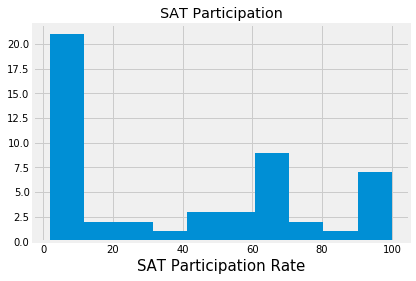

In [125]:
merged_Frames.hist(column="Participation_SAT")
plt.xlabel('SAT Participation Rate', fontsize=15)
plt.title('SAT Participation')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

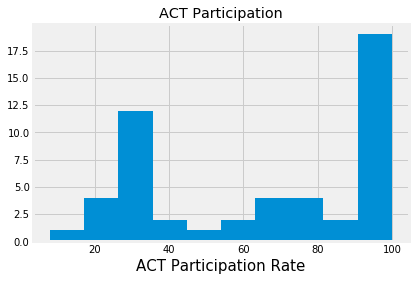

In [126]:
merged_Frames.hist(column="Participation_ACT")
plt.xlabel('ACT Participation Rate', fontsize=15)
plt.title('ACT Participation')
plt.show

##### 17. Plot the Math(s) distributions from both data sets.

## 1- SAT:

In [127]:
np.median(merged_Frames.Math_SAT)

548.0

In [128]:
np.mean(merged_Frames.Math_SAT)

547.6274509803922

In [129]:
np.std(merged_Frames.Math_SAT)

84.07255521608297

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd95ed780>]],
      dtype=object)

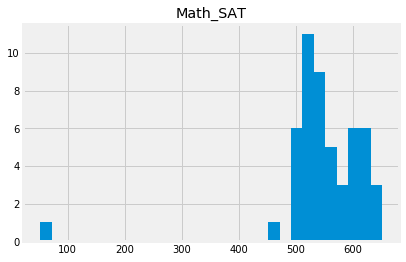

In [130]:
merged_Frames.hist(column="Math_SAT",bins=30)

#### Answer for Q24.1

For Math_SAT, the mean and meadian are closely similar. Median(548) , mean(547). Thus, the distribution should be normal. Moreover, left skewed histogram is clear. However, some outliers might affect the shape.  Removing this outlier might make a better normal distribution.

## 2- ACT:

In [131]:
np.mean(merged_Frames.Math_ACT)

21.182352941176468

In [132]:
np.median(merged_Frames.Math_ACT)

20.9

In [133]:
np.std(merged_Frames.Math_ACT)

1.9624620273436781

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd95320b8>]],
      dtype=object)

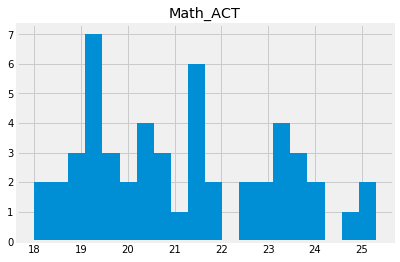

In [134]:
merged_Frames.hist(column="Math_ACT",bins=20)

#### Answer Q24.2
The mean is 21.18 and the meadian is 20.9 . Again this should make a normal distribution. However, the above histogram did not show a clear normal distribution.

##### 18. Plot the Verbal distributions from both data sets.

    SAT Verbal:  Evidence-Based Reading and Writing

Text(0.5,1,'SAT Verbal Scores')

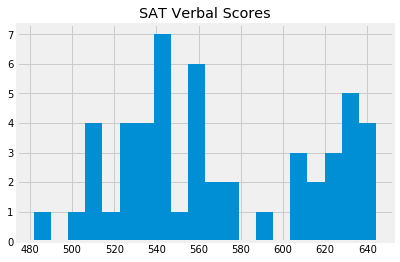

In [135]:
merged_Frames.hist(column= "Evidence_Based_R_and_W", bins=20)
plt.title("SAT Verbal Scores")

In [136]:
np.mean(merged_Frames.Evidence_Based_R_and_W)

569.1176470588235

In [137]:
np.median(merged_Frames.Evidence_Based_R_and_W)

559.0

In [138]:
np.std(merged_Frames.Evidence_Based_R_and_W)

45.21697020437866

#### Answer Q24.3
The mean of SAT verbal scores (Evidence-Based Reading and Writing) distribution (569.11) is larger than the median (559.0). Thus the distribution should be lightly distributed to the left side. 

    ACT Verbal: English and Reading
   

In [139]:
np.mean(merged_Frames.Reading)

22.013725490196077

In [140]:
np.median(merged_Frames.Reading)

21.8

In [141]:
np.std(merged_Frames.Reading)

2.0469029314842646

Text(0.5,1,'ACT Reading Scores')

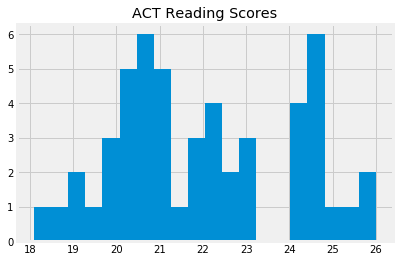

In [142]:
merged_Frames.hist(column="Reading", bins=20)
plt.title("ACT Reading Scores")

#### Answer Q24.4
As shown above, the mean = 22.01 and the median = 21.8 which are closer values. However, the spread of the distribution which is clearly appear on the histogram is might be a reason of a 2.04 std. 

In [143]:
np.mean(merged_Frames.English)

20.931372549019606

In [144]:
np.median(merged_Frames.English)

20.7

In [145]:
np.std(merged_Frames.English)

2.3304876369363363

Text(0.5,1,'ACT English Scores')

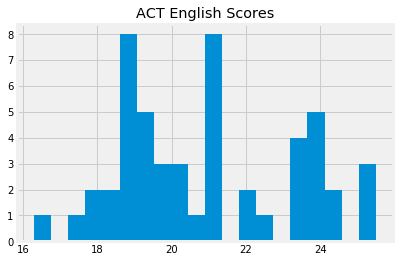

In [146]:
merged_Frames.hist(column="English", bins=20)
plt.title("ACT English Scores")

#### Answer Q24.5
Again very simialr mean and meadian should indacate a normal distribution shape. However, with 2.33 std the histogram apears to be more spreaded. 

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

    If it is match the normal distribution

##### 20. Does this assumption hold true for any of our columns? Which?

    If we consider there are some outliers in Math_SAT, it will be the nearest to be ture assemption if we remove them. Also the mean and median are similar 

##### 21. Plot some scatterplots examining relationships between all variables.

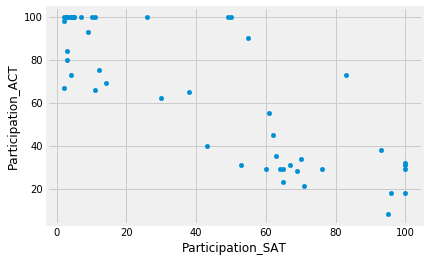

In [147]:
merged_Frames.plot.scatter('Participation_SAT', 'Participation_ACT')


In [148]:
np.corrcoef(merged_Frames['Total_SAT'],merged_Frames['Composite'])

array([[ 1.        , -0.44502019],
       [-0.44502019,  1.        ]])

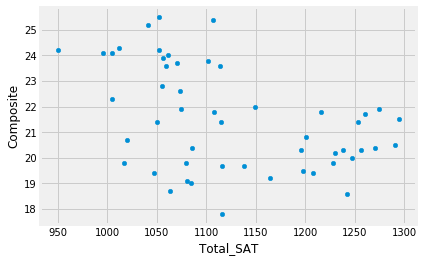

In [149]:
merged_Frames.plot.scatter("Total_SAT", "Composite")


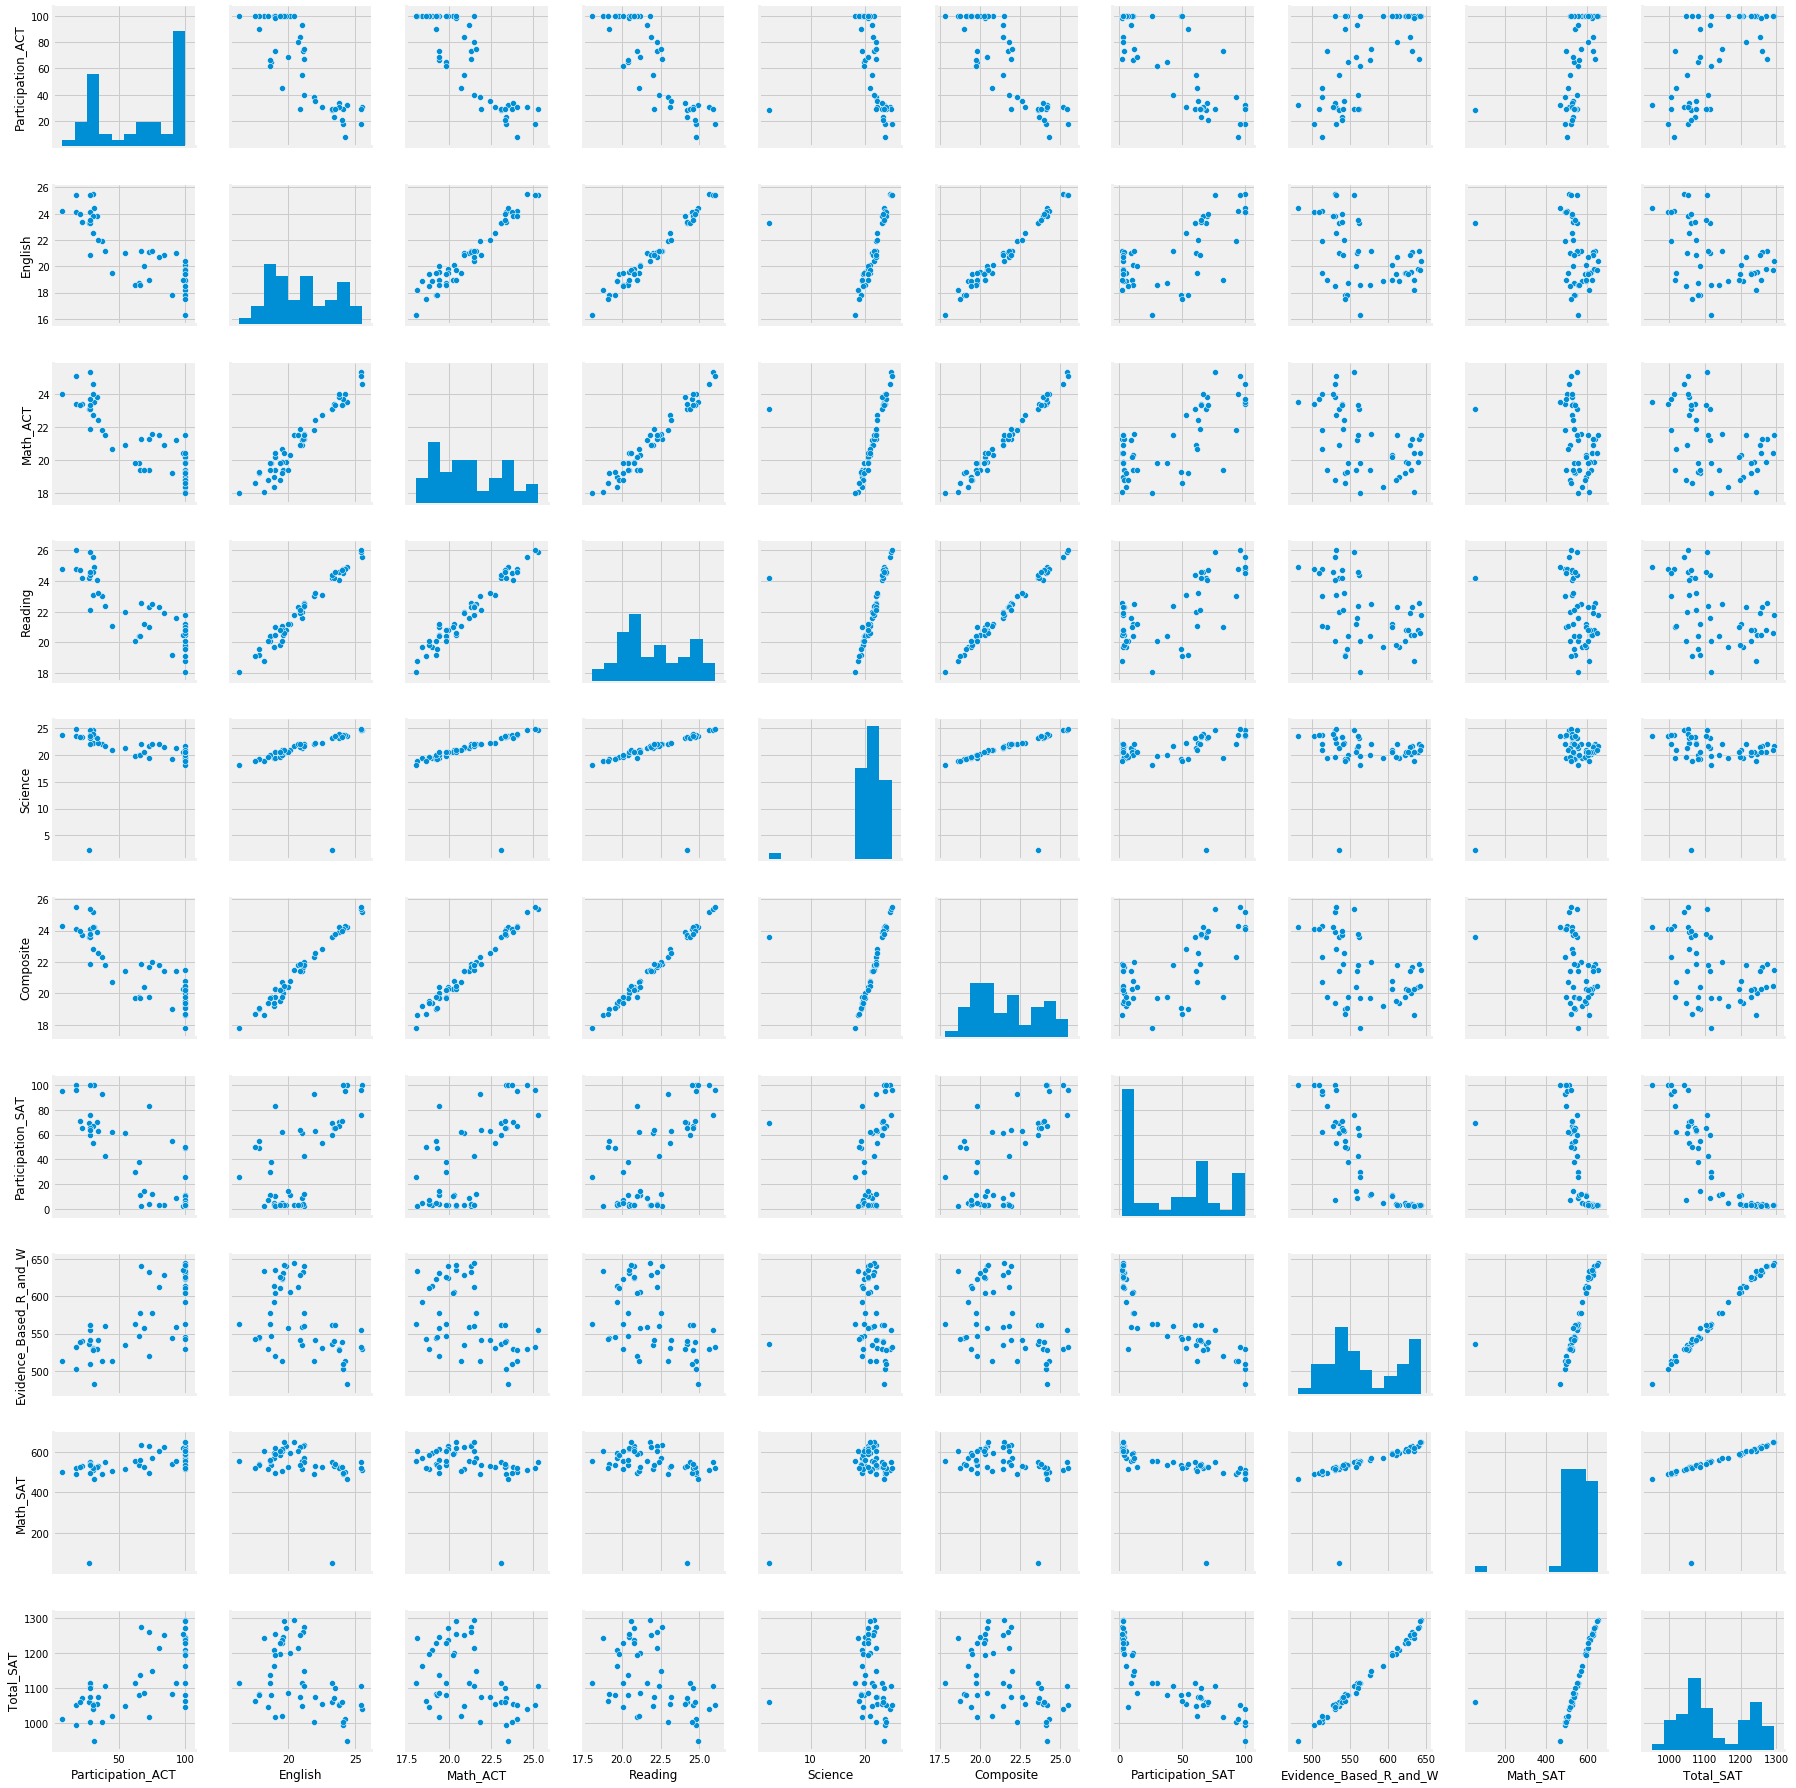

In [150]:
scatterPlot = sns.pairplot(merged_Frames)

##### 22. Are there any interesting relationships to note?

    There is a positive correlation between composite and both of English, Math, Reading, and Science in ACT scores. 
    There is also a positive correlation between Reading and Math as well as with Math in the ACT 

    The total SAT seems to be more affected by Evidence-based Reading and Writing as they are positively correlated. The outlier shown in total SAT with relation with Math Sat might also affect a better correlation.

##### 23. Create box plots for each variable. 

    ACT variables except participation

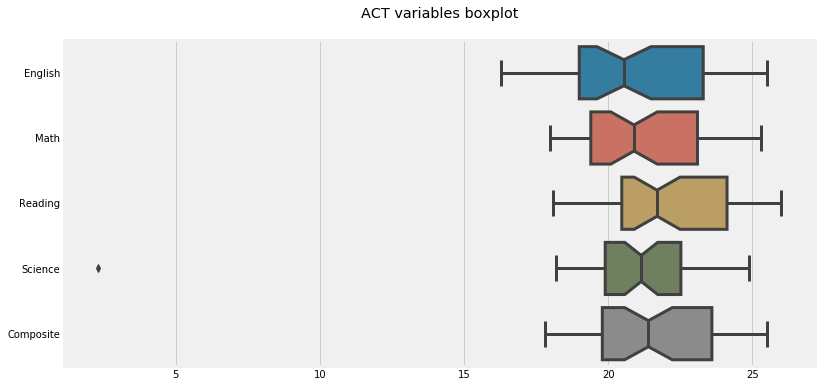

In [151]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
act_new = actDF.drop(["Participation"], axis=1)
ax = sns.boxplot(data=act_new, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('ACT variables boxplot\n')
plt.show()

In [152]:
act_new.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


    SAT variables except participation
    

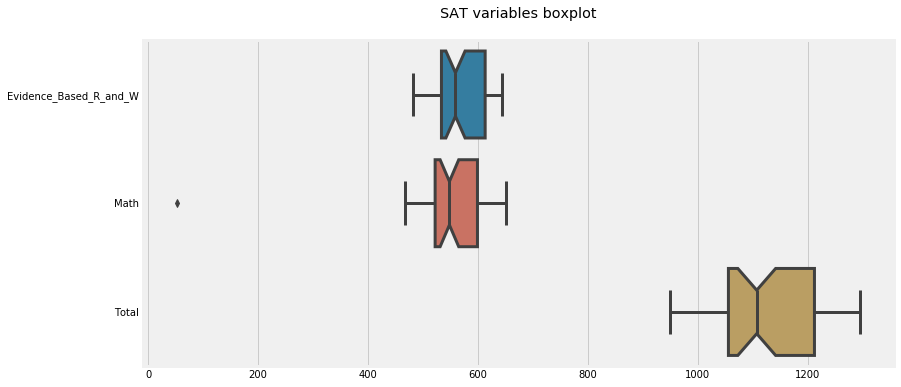

In [153]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sat_new = satDF.drop(["Participation"], axis=1)
ax = sns.boxplot(data=sat_new, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('SAT variables boxplot\n')
plt.show()

In [154]:
sat_new.describe()

,Evidence_Based_R_and_W,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


    SAT and ACT participation boxplot

Text(0.5,1,'Participation Rates')

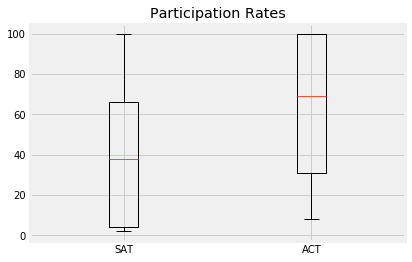

In [155]:
participations = [merged_Frames['Participation_SAT'], 
                  merged_Frames['Participation_ACT']]
labels = ('SAT', 'ACT')
plt.boxplot(participations,labels=labels,vert=True)
plt.title('Participation Rates')


In [156]:
np.mean(merged_Frames.Participation_ACT)

65.25490196078431

In [157]:
np.median(merged_Frames.Participation_ACT)

69.0

In [158]:
np.mean(merged_Frames.Participation_SAT)

39.80392156862745

In [159]:
np.median(merged_Frames.Participation_SAT)

38.0

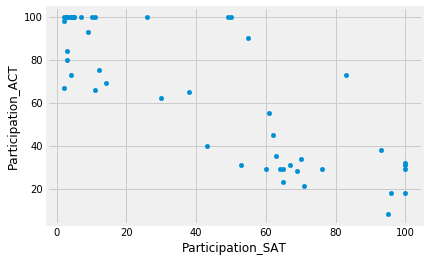

In [160]:
merged_Frames.plot.scatter('Participation_SAT', 'Participation_ACT')


In [161]:
np.corrcoef(merged_Frames['Participation_SAT'],merged_Frames['Participation_ACT'])

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

### Answer Q 25.1
When looking at Participation_ACT and Participation_SAT correlation coefficients(-0.841), it shows that a strong negative correlation relationship. It also shows from the scatterplot above. This is might be becouse one test is important than another in one particular state. If participents take one, they ignore the other?? or may be just by a chance? 

from the boxplot and other stats (mean and meadian) for both tests, it seems that ACT has higher mean in participation. 

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [162]:
#Can be Done by R or Tableau 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

  - There are three important things should be considered when discribing any distribution:
    - Center(Mean,Median and Mode)
    - Shape (left or right skewed, flat?)
    - Spread (Veriance, SD, outliers)
    
### Below each histogram abover, there is some explination

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

### Look at above for a part of this answer
 There is a positive correlation between composition and both of English, Math, Reading, and Science in ACT scores. 
    There is also a positive correlation between Reading and Math as well as with Math in the ACT 

 The total SAT seems to be more affected by Evidence-based Reading and Writing as they are positively correlated. The outlier shown in total SAT with relation with Math Sat might also affect a better correlation.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [163]:
#from above and store it in a veriable as following:
np.mean(merged_Frames.Participation_ACT)

65.25490196078431

In [164]:
np.mean(merged_Frames.Participation_SAT)

39.80392156862745

In [165]:
np.median(merged_Frames.Participation_ACT)

69.0

In [166]:
np.median(merged_Frames.Participation_SAT)

38.0

In [167]:
# t-test from scipy
from scipy import stats

stats.ttest_ind( merged_Frames['Participation_SAT'], merged_Frames['Participation_ACT'])


Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

The two-sample t-test for 2 samples is defined as:
null hypothesis

H0: μ 1 = μ 2
or: 
H0: μ 1 – μ 2 = 0

alternative hypothesis:

Ha : μ 1 ≠ μ 2
or: 
Ha : μ 1 – μ 2 ≠ 0

From the above t-test, pvalue is 0.0002 is less than $\alpha = 0.05$. Thus, we reject the null hypothesis and accept the alternative hypothesis therfore, the 2 population means are not equal 


##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [168]:
#ACT 
# from the confidence-intervals class:
single_mean = np.mean(merged_Frames.Participation_ACT)
single_sem = np.std(merged_Frames.Participation_ACT)/np.sqrt(len(merged_Frames.Participation_ACT))

stats.norm.interval(0.95, single_mean, single_sem)

(56.5207615945811, 73.98904232698752)

We are 95% confident that the true mean of ACT test participation is between 56.5 and 73.9



In [169]:
#SAT
single_mean = np.mean(merged_Frames.Participation_SAT)
single_sem = np.std(merged_Frames.Participation_SAT)/np.sqrt(len(merged_Frames.Participation_SAT))

stats.norm.interval(0.95, single_mean, single_sem)

(30.217643220943465, 49.39019991631144)

In other words, there is a 95% probability that the number of SAT test participation is between 30.2 and 49.3 

In [170]:
#Alternative solution
# sample_mean =
# z_star =
# sigma =
# n =

# low_end = sample_mean - z_star * sigma / n ** 0.5

# high_end = sample_mean + z_star * sigma / n ** 0.5

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

I am little bit confused, The statistics shows a normal distribution shape and there was a significant difference between the poplutation means of both participations in ACT and SAT. However, not shown as normally distributed data. May be that becouse different scoring scales for each test?? We can normalized the data then do the analysis again and see how it goes

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

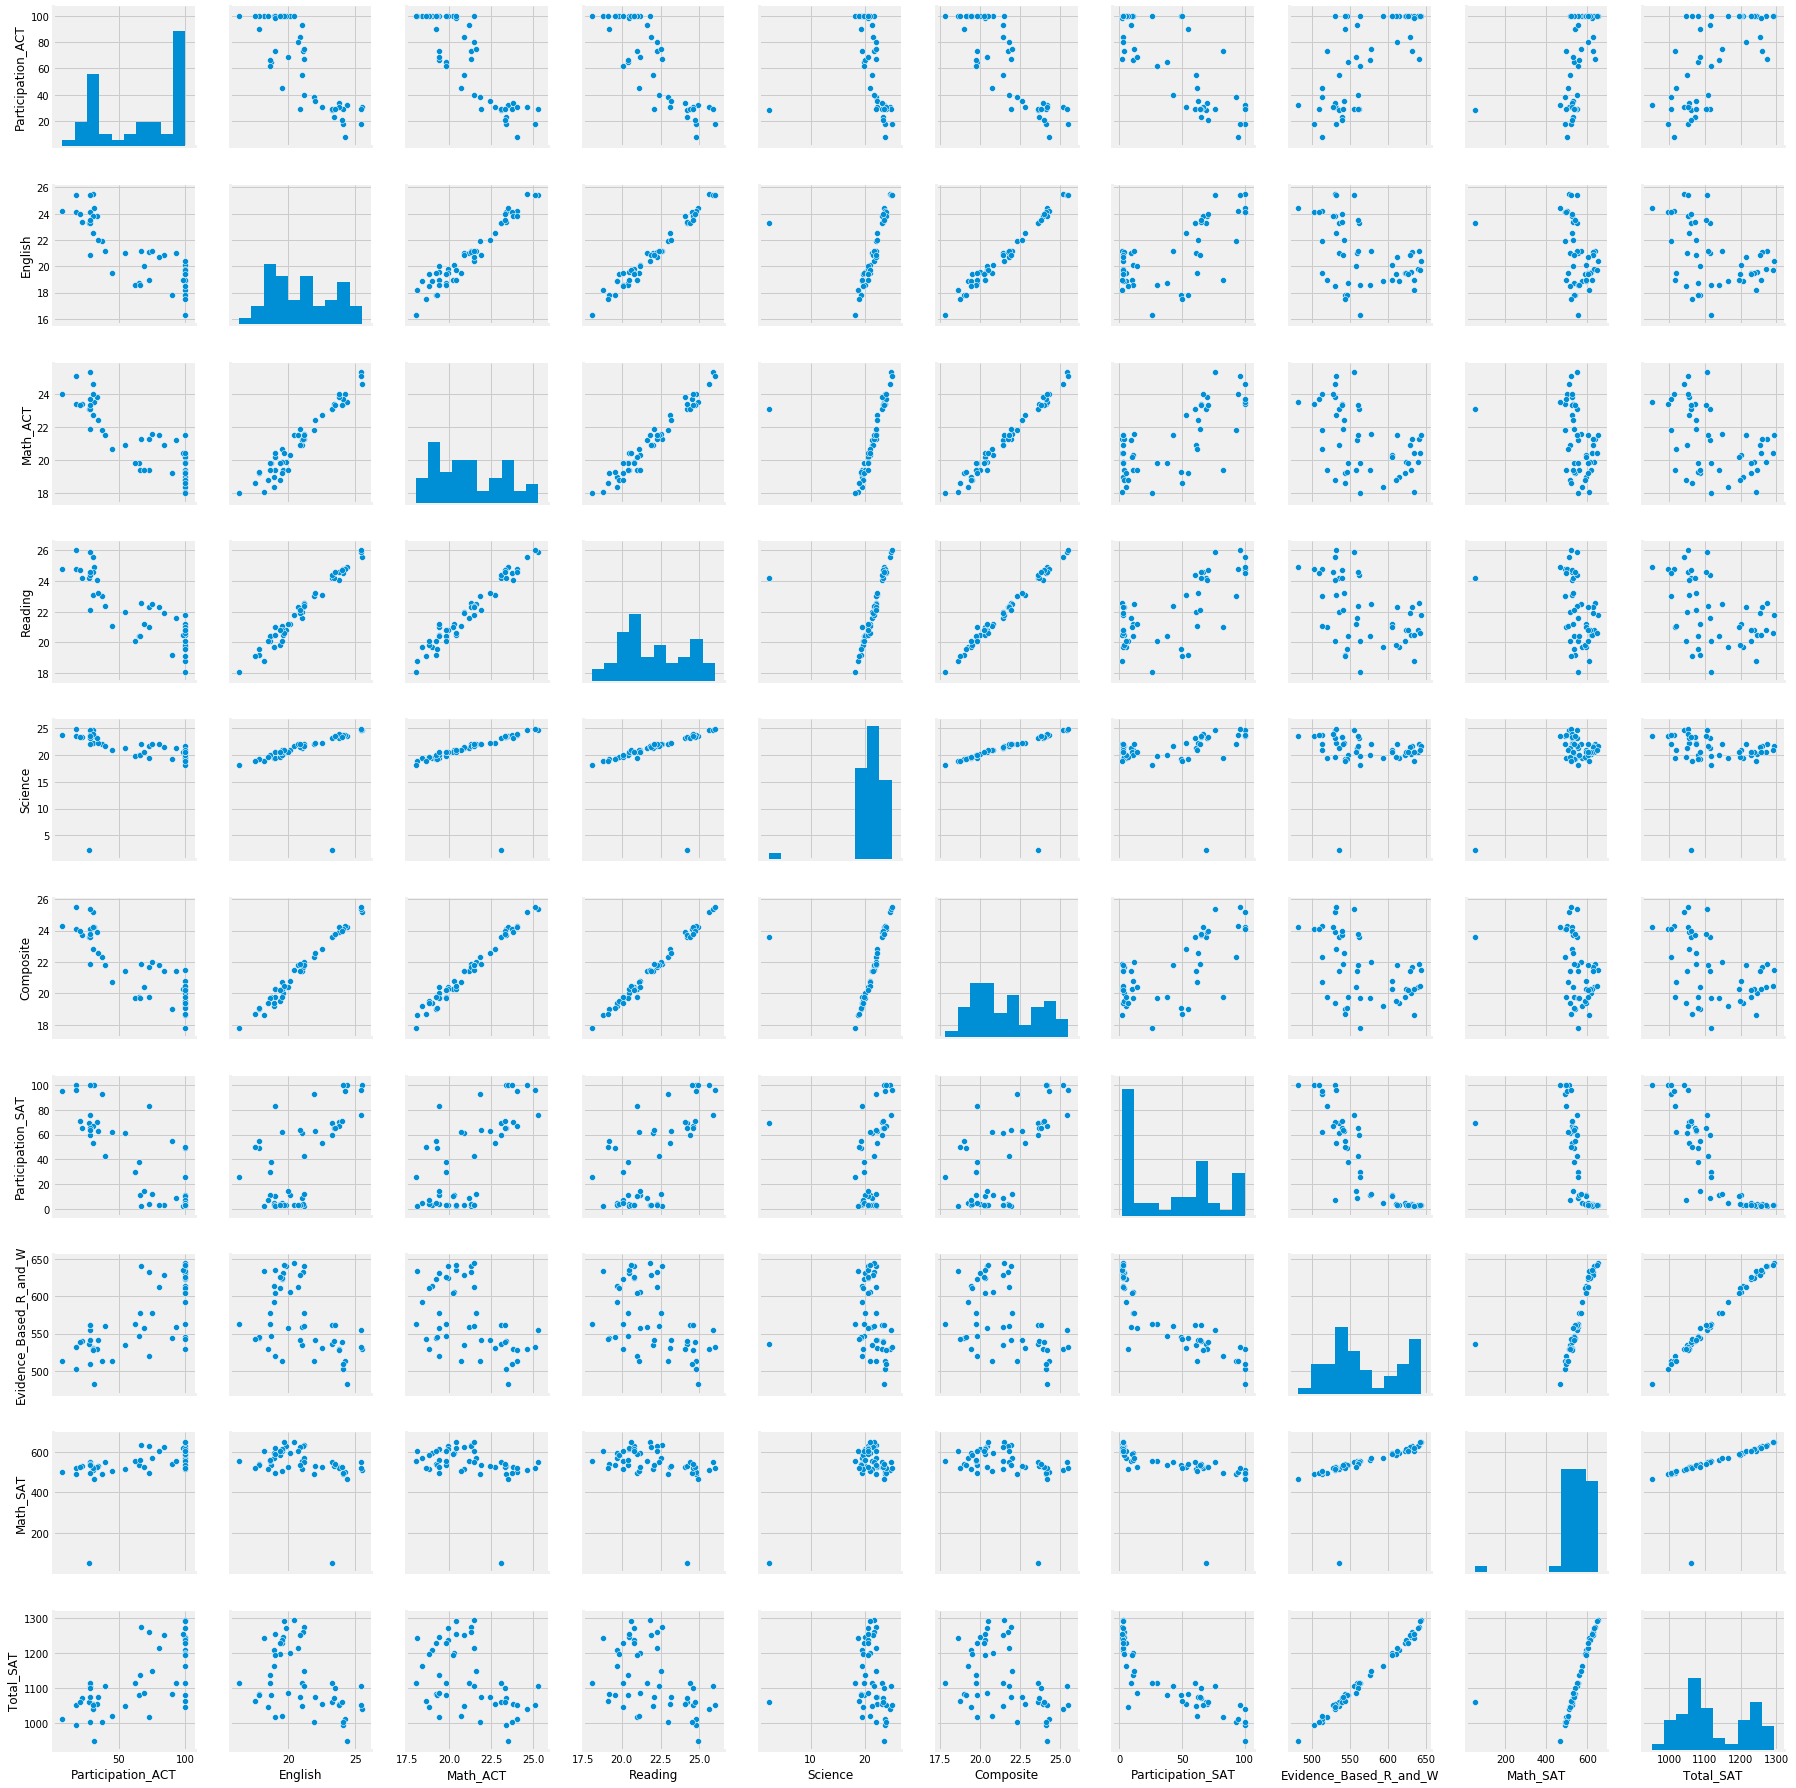

In [171]:
scatterPlot = sns.pairplot(merged_Frames)

I am also confused, it shows there is a positive correlation. However, the different scoring scales for each test should not affect the correlation. But we can normalize the data then do the analysis again and see how it goes.  

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No it will not make sense as a small data set and the previouse years might have completely different results. We should have more than a year (collect more data) in order to do much better solid analysis.